In [ ]:
DATA_PATH = "data/"

# Standardize NSL-KDD data with z-score

In [ ]:
import pandas as pd

In [ ]:
col_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'cluster', 'difficulty']
continious_cols = ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

In [ ]:
kdd_df = pd.read_csv(DATA_PATH+'KDDTrain+_20Percent.txt', names=col_names)
kdd_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,cluster,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
kdd_34_cols = kdd_df.filter(['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'], axis=1)
kdd_34_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   src_bytes                    25192 non-null  int64  
 2   dst_bytes                    25192 non-null  int64  
 3   wrong_fragment               25192 non-null  int64  
 4   urgent                       25192 non-null  int64  
 5   hot                          25192 non-null  int64  
 6   num_failed_logins            25192 non-null  int64  
 7   num_compromised              25192 non-null  int64  
 8   root_shell                   25192 non-null  int64  
 9   su_attempted                 25192 non-null  int64  
 10  num_root                     25192 non-null  int64  
 11  num_file_creations           25192 non-null  int64  
 12  num_shells                   25192 non-null  int64  
 13  num_access_files

In [ ]:
import numpy as np

a = "1,2,3,4,5"
b = a.split(",")
np.array(b).astype(int)

array([1, 2, 3, 4, 5])

In [ ]:
Y = kdd_df['cluster'] # label
X = kdd_34_cols
df = kdd_34_cols # df includes label
df['cluster'] = Y
# for some reason in nsl-kdd num_outbound_cmds is NaN when scaled
# so we end up with 33 cols + label
df = df.drop(columns=['num_outbound_cmds']) 

In [ ]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'cluster'],
      dtype='object')

In [ ]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.select_dtypes(exclude=['object']).columns: # don't scale the label...
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

In [ ]:
# z score scaling ( 2 columns create nan)
df2 = z_score(df)
df2.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,cluster
0,-0.113548,-0.009889,-0.039309,-0.091221,-0.0063,-0.091932,-0.02622,-0.021872,-0.039376,-0.027665,...,-0.813968,-0.779141,-0.280668,0.073118,-0.287988,-0.641791,-0.627352,-0.221664,-0.374273,normal
1,-0.113548,-0.010032,-0.039309,-0.091221,-0.0063,-0.091932,-0.02622,-0.021872,-0.039376,-0.027665,...,-1.030875,-1.157808,2.764349,2.375573,-0.287988,-0.641791,-0.627352,-0.385132,-0.374273,normal
2,-0.113548,-0.010092,-0.039309,-0.091221,-0.0063,-0.091932,-0.02622,-0.021872,-0.039376,-0.027665,...,-0.804931,-0.935063,-0.173825,-0.478174,-0.287988,1.603803,1.614422,-0.385132,-0.374273,neptune
3,-0.113548,-0.009996,0.052472,-0.091221,-0.0063,-0.091932,-0.02622,-0.021872,-0.039376,-0.027665,...,1.264717,1.069642,-0.440932,-0.380887,0.073758,-0.574424,-0.604935,-0.385132,-0.342761,normal
4,-0.113548,-0.010010,-0.034581,-0.091221,-0.0063,-0.091932,-0.02622,-0.021872,-0.039376,-0.027665,...,1.264717,1.069642,-0.440932,-0.478174,-0.287988,-0.641791,-0.627352,-0.385132,-0.374273,normal


In [ ]:
# save
df.to_csv(DATA_PATH+'nsl-kdd-clean.txt', index=False, header=False)
df2.to_csv(DATA_PATH+'nsl-kdd-clean-scaled.txt', index=False, header=False)
# with header (for river DenStream)
df.to_csv(DATA_PATH+'nsl-kdd-clean-header.txt', index=False)
df2.to_csv(DATA_PATH+'nsl-kdd-clean-scaled-header.txt', index=False)

### Get dictionary needed during predict in RIVER DenStream

In [ ]:
from collections import OrderedDict

In [ ]:
b = OrderedDict()
#TODO: idk what a was here fix later
for x,y in zip(a.columns, a.iloc[0,:]):
    b[x] = y
print(b)

### Plot data

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import colorcet as cc #palette

In [ ]:
Y.value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
multihop               2
phf                    2
ftp_write              1
land                   1
loadmodule             1
spy                    1
Name: cluster, dtype: int64

In [ ]:
rand_state = 123

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  float64
 1   src_bytes                    25192 non-null  float64
 2   dst_bytes                    25192 non-null  float64
 3   wrong_fragment               25192 non-null  float64
 4   urgent                       25192 non-null  float64
 5   hot                          25192 non-null  float64
 6   num_failed_logins            25192 non-null  float64
 7   num_compromised              25192 non-null  float64
 8   root_shell                   25192 non-null  float64
 9   su_attempted                 25192 non-null  float64
 10  num_root                     25192 non-null  float64
 11  num_file_creations           25192 non-null  float64
 12  num_shells                   25192 non-null  float64
 13  num_access_files

In [ ]:
df2.isnull().values.any()

False

In [ ]:
# scaled
x_scaled = df2.iloc[:,:-1].values
tsne_scaled = TSNE(n_components=2, verbose=1, random_state=rand_state)
z_scaled = tsne_scaled.fit_transform(x_scaled) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 25192 samples in 0.001s...
[t-SNE] Computed neighbors for 25192 samples in 19.520s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25192
[t-SNE] Computed conditional probabilities for sample 2000 / 25192
[t-SNE] Computed conditional probabilities for sample 3000 / 25192
[t-SNE] Computed conditional probabilities for sample 4000 / 25192
[t-SNE] Computed conditional probabilities for sample 5000 / 25192
[t-SNE] Computed conditional probabilities for sample 6000 / 25192
[t-SNE] Computed conditional probabilities for sample 7000 / 25192
[t-SNE] Computed conditional probabilities for sample 8000 / 25192
[t-SNE] Computed conditional probabilities for sample 9000 / 25192
[t-SNE] Computed conditional probabilities for sample 10000 / 25192
[t-SNE] Computed conditional probabilities for sample 11000 / 25192
[t-SNE] Computed conditional probabilities for sample 12000 / 25192
[t-SNE] Computed conditional probabilities for sa

In [ ]:
x = df.iloc[:,:-1].values
tsne = TSNE(n_components=2, verbose=1, random_state=rand_state)
z = tsne.fit_transform(x) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 25192 samples in 0.001s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 25192 samples in 13.378s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25192
[t-SNE] Computed conditional probabilities for sample 2000 / 25192
[t-SNE] Computed conditional probabilities for sample 3000 / 25192
[t-SNE] Computed conditional probabilities for sample 4000 / 25192
[t-SNE] Computed conditional probabilities for sample 5000 / 25192
[t-SNE] Computed conditional probabilities for sample 6000 / 25192
[t-SNE] Computed conditional probabilities for sample 7000 / 25192
[t-SNE] Computed conditional probabilities for sample 8000 / 25192
[t-SNE] Computed conditional probabilities for sample 9000 / 25192
[t-SNE] Computed conditional probabilities for sample 10000 / 25192
[t-SNE] Computed conditional probabilities for sample 11000 / 25192
[t-SNE] Computed conditional probabilities for sample 12000 / 25192
[t-SNE] Computed conditional probabilities for sample 13000 / 25192
[t-SNE] Computed conditional probabilities for sample 14000 / 2519

In [ ]:
# y = df['cluster']
zdf = pd.DataFrame()
zdf["y"] = Y
zdf["comp-1"] = z[:,0]
zdf["comp-2"] = z[:,1]

plt.figure(figsize=(20, 12))
sns.scatterplot(x="comp-1", y="comp-2", hue=zdf.y.tolist(),
                palette=sns.color_palette(cc.glasbey, y.nunique()),
                data=zdf).set(title="NSL-KDD T-SNE projection") 

plt.savefig(DATA_PATH+f'tsne-{rand_state}.png')

NameError: ignored

<Figure size 1440x864 with 0 Axes>

In [ ]:
# scaled
y = df2['cluster']
zdf_scaled = pd.DataFrame()
zdf_scaled["y"] = Y
zdf_scaled["comp-1"] = z_scaled[:,0]
zdf_scaled["comp-2"] = z_scaled[:,1]

plt.figure(figsize=(20, 12))
sns.scatterplot(x="comp-1", y="comp-2", hue=zdf_scaled.y.tolist(),
                palette=sns.color_palette(cc.glasbey, y.nunique()),
                data=zdf_scaled).set(title="NSL-KDD SCALED T-SNE projection") 
plt.savefig(DATA_PATH+f'tsne-{rand_state}-scaled.png')

# Kafka Stream Producer



## Input Stream for pyDenStream

In [ ]:
import numpy as np

In [ ]:
num_samples = 100
num_features = 2

sigma = 0.1

In [ ]:
# Generating test data

np.random.seed(42)

# Generating data for cluster 1.
center_1 = np.array([1.0, 1.0]).reshape((1, num_features))
x_1 = center_1 + np.random.normal(0.0, sigma, [num_samples, num_features])
y_1 = np.repeat(0, num_samples).reshape((num_samples, 1))
t_1 = np.linspace(1, 100, num=num_samples).reshape((num_samples, 1))

# Generating data for cluster 2.
center_2 = np.array([1.0, -1.0]).reshape((1, num_features))
x_2 = center_2 + np.random.normal(0.0, sigma, [num_samples, num_features])
y_2 = np.repeat(1, num_samples).reshape((num_samples, 1))
t_2 = np.linspace(101, 200, num=num_samples).reshape((num_samples, 1))

# Generating data for cluster 3.
center_3 = np.array([-1.0, -1.0]).reshape((1, num_features))
x_3 = center_3 + np.random.normal(0.0, sigma, [num_samples, num_features])
y_3 = np.repeat(2, num_samples).reshape((num_samples, 1))
t_3 = np.linspace(51, 150, num=num_samples).reshape((num_samples, 1))

# Generating data for cluster 4.
center_4 = np.array([-1.0, 1.0]).reshape((1, num_features))
x_4 = center_4 + np.random.normal(0.0, sigma, [num_samples, num_features])
y_4 = np.repeat(3, num_samples).reshape((num_samples, 1))
t_4 = np.linspace(51, 150, num=num_samples).reshape((num_samples, 1))

X = np.concatenate([x_1, x_2, x_3, x_4], axis=0).astype(float)
Y = np.concatenate([y_1, y_2, y_3, y_4], axis=0).astype(int)
T = np.concatenate([t_1, t_2, t_3, t_4], axis=0).astype(int)

# Sorting data s.t. they come in time order.
idx = np.argsort(T, axis=0).reshape(T.shape[0],)
X = X[idx, :]
Y = Y[idx, :]
T = T[idx, :]

In [ ]:
dd = ['-0.11354840373626408', '-0.009888657207779367', '-0.03930900525595726', '-0.008910299337739708', '-0.09122136504337669', '-0.0063004080276369435', '-0.09193152797180429', '-0.026219769982544758', '-0.807609787797152', '-0.021872171578008325', '-0.039375745398740974', '-0.02766492418726678', '-0.02172373325676766', '-0.02780746500248676', '-0.018904226064123595', '-0.04391591310971378', '', '', '-0.09598770513349468', '-0.7202293041337874', '-0.3546209051863896', '-0.6401293050536373', '-0.6339655896963234', '-0.3721782160049241', '-0.3730909421766657', '0.7720933378224009', '-0.3492750103829506', '-0.37387866035601564', '-0.3286270696101938', '-0.8139683650869229', '-0.7791414317434174', '-0.28066772665993234', '0.07311828800458804', '-0.2879877479897399', '-0.6417913327308392', '-0.627352295451972', '-0.22166365605050056', '-0.3742733197216746', 'normal']

['-0.11354840373626408',
 '-0.009888657207779367',
 '-0.03930900525595726',
 '-0.008910299337739708',
 '-0.09122136504337669',
 '-0.0063004080276369435',
 '-0.09193152797180429',
 '-0.026219769982544758',
 '-0.807609787797152',
 '-0.021872171578008325',
 '-0.039375745398740974',
 '-0.02766492418726678',
 '-0.02172373325676766',
 '-0.02780746500248676',
 '-0.018904226064123595',
 '-0.04391591310971378',
 '',
 '',
 '-0.09598770513349468',
 '-0.7202293041337874',
 '-0.3546209051863896',
 '-0.6401293050536373',
 '-0.6339655896963234',
 '-0.3721782160049241',
 '-0.3730909421766657',
 '0.7720933378224009',
 '-0.3492750103829506',
 '-0.37387866035601564',
 '-0.3286270696101938',
 '-0.8139683650869229',
 '-0.7791414317434174',
 '-0.28066772665993234',
 '0.07311828800458804',
 '-0.2879877479897399',
 '-0.6417913327308392',
 '-0.627352295451972',
 '-0.22166365605050056',
 '-0.3742733197216746',
 'normal']

In [ ]:
ddf = pd.DataFrame(dd).replace('', np.nan, inplace=True)
ddf

In [ ]:
type(X[1, :].reshape(1, X.shape[1]))

numpy.ndarray

In [ ]:
type(Z.reshape(1, Z.shape[0]))

numpy.ndarray

In [ ]:
X[1, :].reshape(1, X.shape[1])

array([[1.06476885, 1.15230299]])

In [ ]:
X[1, :]

array([1.06476885, 1.15230299])

In [ ]:
Z.reshape(1, Z.shape[0])

array([['0', 'tcp', 'ftp_data', 'SF', '491', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2',
        '2', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00',
        '150', '25', '0.17', '0.03', '0.17', '0.00', '0.00', '0.00',
        '0.05']], dtype='<U8')

In [ ]:
X[0, :].reshape((1, X.shape[1]))

array([[1.04967142, 0.98617357]])

In [ ]:
X

array([[ 1.04967142,  0.98617357],
       [ 1.06476885,  1.15230299],
       [ 0.97658466,  0.9765863 ],
       [ 1.15792128,  1.07674347],
       [ 0.95305256,  1.054256  ],
       [ 0.95365823,  0.95342702],
       [ 1.02419623,  0.80867198],
       [ 0.82750822,  0.94377125],
       [ 0.89871689,  1.03142473],
       [ 0.90919759,  0.85876963],
       [ 1.14656488,  0.97742237],
       [ 1.00675282,  0.85752518],
       [ 0.94556173,  1.01109226],
       [ 0.88490064,  1.0375698 ],
       [ 0.93993613,  0.97083063],
       [ 0.93982934,  1.18522782],
       [ 0.99865028,  0.89422891],
       [ 1.08225449,  0.87791564],
       [ 1.02088636,  0.80403299],
       [ 0.8671814 ,  1.01968612],
       [ 1.07384666,  1.01713683],
       [ 0.98843517,  0.96988963],
       [ 0.8521478 ,  0.92801558],
       [ 0.95393612,  1.10571222],
       [ 1.03436183,  0.82369598],
       [ 1.0324084 ,  0.96149177],
       [ 0.9323078 ,  1.06116763],
       [ 1.10309995,  1.09312801],
       [ 0.91607825,

In [ ]:
X.shape

(400, 2)

In [ ]:
X[1,:]

array([1.06476885, 1.15230299])

In [ ]:
X[1,:].reshape((1, X.shape[1]))

array([[1.06476885, 1.15230299]])

In [ ]:
{ x:i for i,x in enumerate("back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster".split(","))}

{'back': 0,
 'buffer_overflow': 1,
 'ftp_write': 2,
 'guess_passwd': 3,
 'imap': 4,
 'ipsweep': 5,
 'land': 6,
 'loadmodule': 7,
 'multihop': 8,
 'neptune': 9,
 'nmap': 10,
 'normal': 11,
 'perl': 12,
 'phf': 13,
 'pod': 14,
 'portsweep': 15,
 'rootkit': 16,
 'satan': 17,
 'smurf': 18,
 'spy': 19,
 'teardrop': 20,
 'warezclient': 21,
 'warezmaster': 22}

In [ ]:

def file_reader(file_name):
    """Generator for reading the dataset. Call with next(gen) to get the next row."""
    for i, data in enumerate(open(file_name, "r")):
        data = np.array(data.rstrip("\n").split(',')[:-1], dtype=object)#.astype(int)
        print(data)
        # data = list(map(lambda x: int(x), data))
        yield {
            "time" : int(i+1),
            "feature_array" : data[:-2].reshape((1, data[:-2].shape[0])),
            "label" : int(data[-2:-1]),
        }

In [ ]:
reader = file_reader(DATA_PATH+'KDDTrain+_20Percent.txt')

In [ ]:
next(reader)

['0' 'tcp' 'ftp_data' 'SF' '491' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '2' '2' '0.00' '0.00' '0.00' '0.00' '1.00'
 '0.00' '0.00' '150' '25' '0.17' '0.03' '0.17' '0.00' '0.00' '0.00' '0.05'
 '0.00' 'normal']


{'feature_array': array([['0', 'tcp', 'ftp_data', 'SF', '491', '0', '0', '0', '0', '0',
         '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2',
         '2', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00',
         '150', '25', '0.17', '0.03', '0.17', '0.00', '0.00', '0.00',
         '0.05']], dtype=object),
 'label': array(['0.00'], dtype=object),
 'time': 1}

In [ ]:
# A generator like this is required for : https://github.com/MrParosk/pyDenStream
# We can change it to populate Kafka topic at specific rate
# and then reuse it for the comparison test

def generator(X, Y, T):
    """
    Creating generator used for fit_generator.
    """

    for i in range(0, X.shape[0]):
        yield {
            "time": int(T[i, :]),
            "feature_array": X[i, :].reshape((1, X.shape[1])),
            "label": int(Y[i, :]),
        }

In [ ]:
gen = generator(X,Y,T)

In [ ]:
next(gen)

{'feature_array': array([[1.06476885, 1.15230299]]), 'label': 0, 'time': 2}

## Other:

In [ ]:
def file_reader(file_name, convertToBytes=False):
    """Generator for reading the dataset. Call with next(gen) to get the next row."""
    for row in open(file_name, "r"):
        if convertToBytes:
            yield bytes(row.rstrip("\n"), encoding="utf-8")
        else:
            yield row.rstrip("\n")

# Synthetic data


In [ ]:
d = {'col1': range(10000), 'col2': range(10000),'col3': range(10000),'col4': range(10000),'col5': range(10000)}
pd.DataFrame(data=d, index=range(10000)).to_csv(DATA_PATH+'blah.csv')

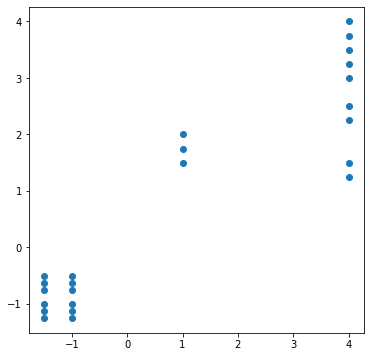

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# make data with easily identify
X = [
[-1, -0.5], [-1, -0.625], [-1, -0.75], [-1, -1], [-1, -1.125],
[-1, -1.25], [-1.5, -0.5], [-1.5, -0.625], [-1.5, -0.75], [-1.5, -1],
[-1.5, -1.125], [-1.5, -1.25], [1, 1.5], [1, 1.75], [1, 2],
[4, 1.25], [4, 1.5], [4, 2.25], [4, 2.5], [4, 3],
[4, 3.25], [4, 3.5], [4, 3.75], [4, 4],
]
x = [t[0] for t in X]
y = [t[1] for t in X]

plt.figure(figsize=(6, 6))
plt.scatter(x, y)